In [1]:
# Dependencies and Setup
import openweathermapy as ow
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [32]:
# Create a settings dictionary with your API key and preferred units
settings = {"units": "imperial", "appid": api_key}

In [93]:
# Store base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set up lists to hold reponse info
clouds = []
country = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f"Processing request for {city}")
    response = requests.get(url + "appid=" + api_key + "&q=" + city +"&units=imperial").json()
    try:
        clouds.append(response["clouds"]["all"])
    except KeyError:
        clouds.append("NaN")
    try:
        country.append(response["sys"]["country"])
    except KeyError:
        country.append("NaN")
    try:
        humidity.append(response["main"]["humidity"])
    except KeyError:
        humidity.append("NaN")
    try:
        lat.append(response["coord"]["lat"])
    except KeyError:
        lat.append("NaN")
    try:
        lon.append(response["coord"]["lon"])
    except KeyError:
        lon.append("NaN")
    try:
        max_temp.append(response["main"]["temp_max"])
    except KeyError:
        max_temp.append("NaN")
    try:
        wind_speed.append(response["wind"]["speed"])
    except KeyError:
        wind_speed.append("NaN")

Processing request for hobart
Processing request for taolanaro
Processing request for karlskrona
Processing request for mar del plata
Processing request for albany
Processing request for castro
Processing request for yumen
Processing request for umkomaas
Processing request for mangan
Processing request for punta arenas
Processing request for jemnice
Processing request for khatanga
Processing request for ancud
Processing request for victoria
Processing request for kavieng
Processing request for sambava
Processing request for umm durman
Processing request for guiratinga
Processing request for barrow
Processing request for mataura
Processing request for puerto ayora
Processing request for torbay
Processing request for arraial do cabo
Processing request for saldanha
Processing request for yellowknife
Processing request for haines junction
Processing request for catamarca
Processing request for jamestown
Processing request for provideniya
Processing request for sao bento do una
Processing r

Processing request for rio claro
Processing request for port keats
Processing request for nioro
Processing request for toora-khem
Processing request for ishinomaki
Processing request for dudinka
Processing request for okhotsk
Processing request for kutum
Processing request for tura
Processing request for malakal
Processing request for luwuk
Processing request for inderborskiy
Processing request for bilibino
Processing request for atlantic city
Processing request for hobyo
Processing request for pangkalanbuun
Processing request for nador
Processing request for kishtwar
Processing request for micheweni
Processing request for ruatoria
Processing request for lieksa
Processing request for vestmanna
Processing request for tasbuget
Processing request for vao
Processing request for chontalpa
Processing request for el alto
Processing request for tarata
Processing request for zagare
Processing request for kolo
Processing request for komsomolskiy
Processing request for narsaq
Processing request f

Processing request for mys shmidta
Processing request for kropotkin
Processing request for qingan
Processing request for chulym
Processing request for rocha
Processing request for dunedin
Processing request for paamiut
Processing request for kautokeino
Processing request for flinders
Processing request for gimli
Processing request for iranshahr
Processing request for muzhi
Processing request for nanortalik
Processing request for tessalit
Processing request for tacuarembo
Processing request for orange cove
Processing request for kibara
Processing request for los llanos de aridane
Processing request for buin
Processing request for fort nelson
Processing request for ormara
Processing request for lavrentiya
Processing request for rawannawi
Processing request for cahul
Processing request for kanchanaburi
Processing request for bibiani
Processing request for phan rang
Processing request for falealupo
Processing request for eirunepe
Processing request for panique
Processing request for ngukur

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:
# create a dictionary from cities and response values
weather_dict = {
    "city": cities,
    "clouds": clouds,
    "country": country,
    "humidity": humidity,
    "lat": lat,
    "lon": lon,
    "max_temp": max_temp,
    "wind_speed": wind_speed
}

#Convert dictionary to dataframe
weather_data = pd.DataFrame(weather_dict)

#Preview dataframe
weather_data.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed
0,hobart,40,AU,42,-42.88,147.33,64.4,21.92
1,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,karlskrona,100,SE,100,56.16,15.59,53.6,5.82
3,mar del plata,0,AR,25,-46.43,-67.52,64.75,10.02
4,albany,1,US,86,42.65,-73.75,41,1.97


In [98]:
#Add today's date to dataframe
date = pd.Timestamp("today").strftime("%m/%d/%Y")
weather_data["date"] = date

#Preview dataframe with new column
weather_data.head()

,city,clouds,country,humidity,lat,lon,max_temp,wind_speed,date
0,hobart,40,AU,42,-42.88,147.33,64.4,21.92,10/19/2019
1,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/19/2019
2,karlskrona,100,SE,100,56.16,15.59,53.6,5.82,10/19/2019
3,mar del plata,0,AR,25,-46.43,-67.52,64.75,10.02,10/19/2019
4,albany,1,US,86,42.65,-73.75,41,1.97,10/19/2019


In [99]:
#Save dataframe to csv
weather_data.to_csv(r"Results/weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

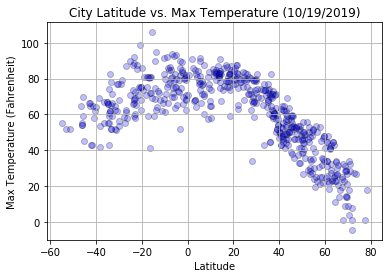

In [107]:
#Create scatter plot showing the relationship of latitude and max temperatures for today
plt.scatter(lat, max_temp, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.grid(True)
plt.savefig("Results/max_temp-latitude.png")

#### Latitude vs. Humidity Plot

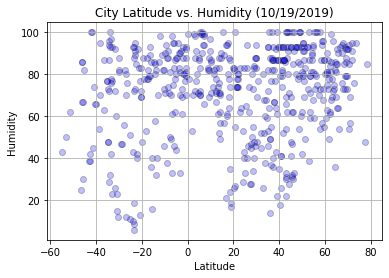

In [109]:
#Create scatter plot showing the relationship of latitude and humidity for today
plt.scatter(lat, humidity, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("Results/humidity-latitude.png")

#### Latitude vs. Cloudiness Plot

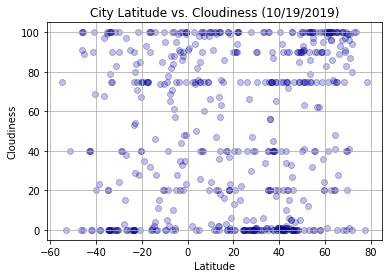

In [110]:
#Create scatter plot showing the relationship of latitude and cloudiness for today
plt.scatter(lat, clouds, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("Results/cloudiness-latitude.png")

#### Latitude vs. Wind Speed Plot

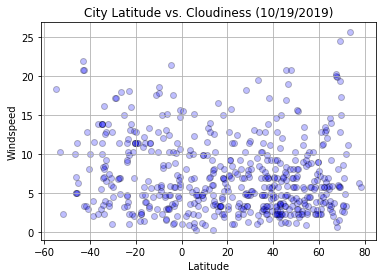

In [111]:
#Create scatter plot showing the relationship of latitude and wind speed for today
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", alpha=0.25, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.grid(True)
# plt.savefig("Results/wind_speed-latitude.png")